# WeatherPy


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs, cities, and countries
# note, I added countries here so that I could pull both cities and their country from the same source
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())
        
# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))


619
619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#build df to store the data from the api calls
city_weather = pd.DataFrame({'City': cities, 'Lat': "", 'Lng': "", 'Max Temp': "", 'Humidity': "", 'Cloudiness': "",
                             'Windspeed': "", 'Country': countries, 'Date': ""})

#put response number into variables
record_num = 1
record_set = 1

#define api url
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#call api for each city
print('''
Beginning Data Retrieval
-----------------------------''')
for index, row in city_weather.iterrows(): 
    
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    #api call
    response = requests.get(query_url).json()
    
    #exception script for cities not listed
    try: 
        #data log
        print(f'Processing Record {record_num} of Set {record_set} | {response["name"]}')
        
        #put data into the df
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        city_weather.loc[index, 'Date'] = response['dt']
        
        #increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
    #set api limits
    if record_num == 501:
        record_set += 1
        record_num = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')
        


Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | Hamilton
Processing Record 2 of Set 1 | Challans
Processing Record 3 of Set 1 | Vaini
Processing Record 4 of Set 1 | Hithadhoo
Processing Record 5 of Set 1 | Huarmey
Processing Record 6 of Set 1 | Hobart
Processing Record 7 of Set 1 | Albany
Processing Record 8 of Set 1 | Saint-Philippe
Processing Record 9 of Set 1 | Sitka
Processing Record 10 of Set 1 | Vanimo
Processing Record 11 of Set 1 | Tuktoyaktuk
Processing Record 12 of Set 1 | Port Lincoln
Processing Record 13 of Set 1 | Marabu
Processing Record 14 of Set 1 | Ushuaia
City not found. Skipping...
Processing Record 15 of Set 1 | Manadhoo
Processing Record 16 of Set 1 | Nānākuli
Processing Record 17 of Set 1 | Flinders
Processing Record 18 of Set 1 | Namatanai
Processing Record 19 of Set 1 | Pokhara
Processing Record 20 of Set 1 | Groningen
Processing Record 21 of Set 1 | Rikitea
Processing Record 22 of Set 1 | Bredas

Processing Record 183 of Set 1 | Tiznit Province
Processing Record 184 of Set 1 | Molteno
Processing Record 185 of Set 1 | Caravelas
Processing Record 186 of Set 1 | Mehamn
Processing Record 187 of Set 1 | Vao
City not found. Skipping...
Processing Record 188 of Set 1 | Sola
Processing Record 189 of Set 1 | Acapetahua
Processing Record 190 of Set 1 | İzmit
Processing Record 191 of Set 1 | East London
Processing Record 192 of Set 1 | Bucerías
Processing Record 193 of Set 1 | Souillac
Processing Record 194 of Set 1 | Norman Wells
Processing Record 195 of Set 1 | Kaniama
Processing Record 196 of Set 1 | Tiksi
Processing Record 197 of Set 1 | Klaksvík
Processing Record 198 of Set 1 | Jardim
Processing Record 199 of Set 1 | Ancud
Processing Record 200 of Set 1 | Benguela
Processing Record 201 of Set 1 | Irbeyskoye
Processing Record 202 of Set 1 | Nadym
Processing Record 203 of Set 1 | Alice Springs
Processing Record 204 of Set 1 | Sisophon
Processing Record 205 of Set 1 | Palmer
Processing 

Processing Record 363 of Set 1 | Dubti
Processing Record 364 of Set 1 | San Patricio
Processing Record 365 of Set 1 | Severo-Kuril'sk
Processing Record 366 of Set 1 | Sfântu Gheorghe
Processing Record 367 of Set 1 | Rawson
Processing Record 368 of Set 1 | Chui
Processing Record 369 of Set 1 | Aqsū
Processing Record 370 of Set 1 | Jacareacanga
Processing Record 371 of Set 1 | Rocha
Processing Record 372 of Set 1 | Noblesville
Processing Record 373 of Set 1 | Bassar
Processing Record 374 of Set 1 | Marrakesh
Processing Record 375 of Set 1 | Olinda
Processing Record 376 of Set 1 | Pangkalanbuun
Processing Record 377 of Set 1 | Heihe
Processing Record 378 of Set 1 | Kollam
Processing Record 379 of Set 1 | Talcahuano
Processing Record 380 of Set 1 | Rosetta
Processing Record 381 of Set 1 | Naze
Processing Record 382 of Set 1 | Fort Nelson
City not found. Skipping...
City not found. Skipping...
Processing Record 383 of Set 1 | Upernavik
Processing Record 384 of Set 1 | Cidreira
Processing Re

Processing Record 42 of Set 2 | Kresttsy
Processing Record 43 of Set 2 | Lukulu
Processing Record 44 of Set 2 | Baghdad
Processing Record 45 of Set 2 | Savalou

-----------------------------
Data Retrival Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#remove cities that were not found
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()
city_weather.to_csv("output_data/CityWeatherData.csv", index=False, header=True)

city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
1,hamilton,32.29,-64.78,75.20,94,75,10.29,BM,1592533049
2,challans,46.84,-1.87,60.01,93,75,4.7,FR,1592533192
3,vaini,-21.2,-175.2,73.40,88,90,13.87,TO,1592533060
4,hithadhoo,-0.6,73.08,84.45,75,93,6.42,MV,1592532799
5,huarmey,-10.07,-78.15,62.40,85,11,7.78,PE,1592533096


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# build a new df with cities that have greater than 100% humidity
hum_check = city_weather.loc[(city_weather['Humidity'] > 100), :]
hum_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date


Since the above df is empty, we have confirmed there are no cities that have humidity > 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

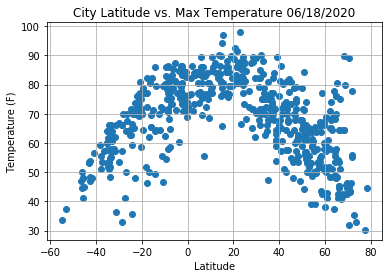

In [7]:
# scatter plot code
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save image
plt.savefig("output_data/City Latitude vs. Max Temperature.png")

plt.show()

- This plot makes sense, as you near the equator the temperature goes up. 

## Latitude vs. Humidity Plot

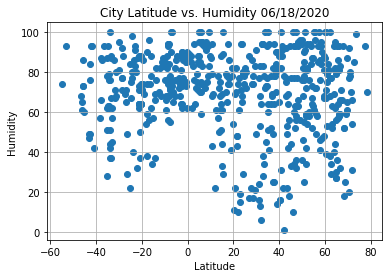

In [8]:
# scatter plot code
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# save image
plt.savefig("output_data/City Latitude vs. Humidity.png")

plt.show()

- This plot is a little less clear, but the humidity likely has much more to do with the proximity to the coast than the latitude.

## Latitude vs. Cloudiness Plot

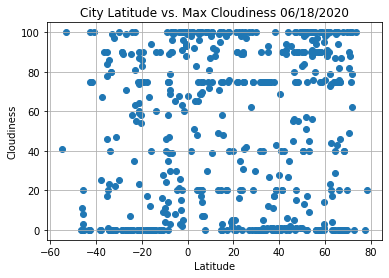

In [9]:
# scatter plot code
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# save image
plt.savefig("output_data/City Latitude vs. Cloudiness.png")

plt.show()

- This plot has even less correlation, which implies there is not much relationship between cloud cover and latitude.

## Latitude vs. Wind Speed Plot

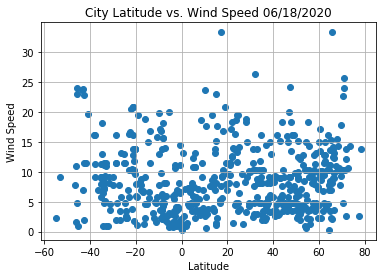

In [10]:
# scatter plot code
plt.scatter(city_weather["Lat"], city_weather["Windspeed"], marker="o")
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# save image
plt.savefig("output_data/City Latitude vs. Wind Speed.png")

plt.show()

- Wind speed is a function of where a city may fall within the earth's wind currents. This has little to do with latitude as demonstrated here.

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_weather.loc[pd.to_numeric(city_weather["Lat"]).astype(float) > 0, :]
southern_df = city_weather.loc[pd.to_numeric(city_weather["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7181129469405846


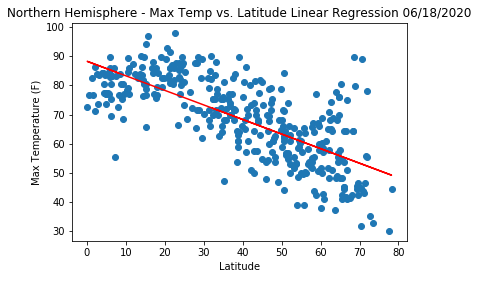

In [13]:
# regression calculation
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatter plot code
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-squared is: {rvalue}")

# save image
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

plt.show()

- As you get further away from the equator, temperatures go down. There are a number of outliers here though, which helps us to know that there is more at play than these two factors.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7412335099425545


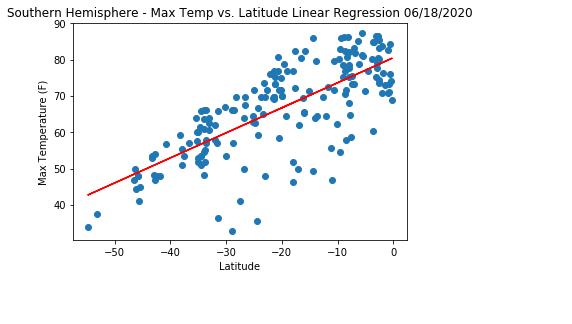

In [14]:
# regression calculation
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatter plot code
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-squared is: {rvalue}")

# save image
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

plt.show()

- As with the Northern Hemisphere, the Southern Hemisphere follows the same patter of general correlation. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.0865673720509137


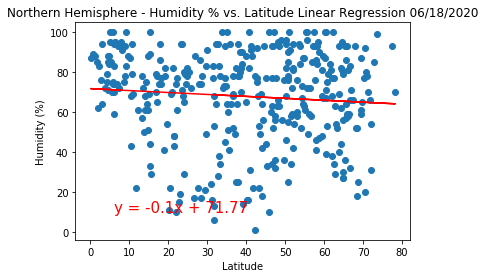

In [15]:
# regression calculation
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatter plot code
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere - Humidity % vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-squared is: {rvalue}")

# save image
plt.savefig("output_data/Northern Hemisphere - Humidity % vs. Latitude Linear Regression.png")

plt.show()

- This line is very slight, as we said earlier there isn't much correlation in humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22053751168849742


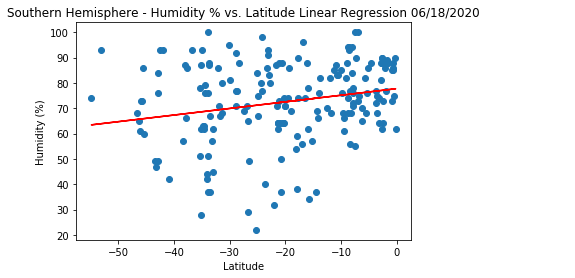

In [16]:
# regression calculation
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatter plot code
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Southern Hemisphere - Humidity % vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-squared is: {rvalue}")

# save image
plt.savefig("output_data/Southern Hemisphere - Humidity % vs. Latitude Linear Regression.png")

plt.show()

- The same can be said for the Souther Hemisphere - not much correlation. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0034776159492071112


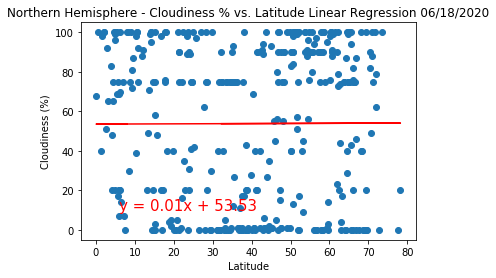

In [17]:
# regression calculation
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatter plot code
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere - Cloudiness % vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {rvalue}")

# save image
plt.savefig("output_data/Northern Hemisphere - Cloudiness % vs. Latitude Linear Regression.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23756974321945615


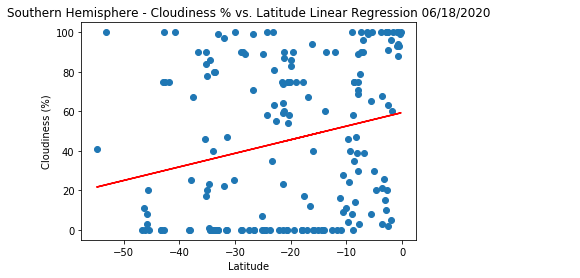

In [18]:
# regression calculation
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatter plot code
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Southern Hemisphere - Cloudiness % vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {rvalue}")

# save image
plt.savefig("output_data/Southern Hemisphere - Cloudiness % vs. Latitude Linear Regression.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09495443631801631


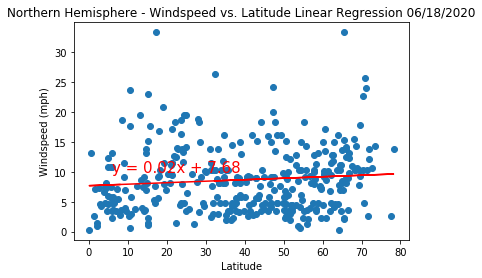

In [20]:
# regression calculation
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Windspeed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatter plot code
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere - Windspeed vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')

print(f"The r-squared is: {rvalue}")

# save image
plt.savefig("output_data/Northern Hemisphere - Windspeed vs. Latitude Linear Regression.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.26148875209767597


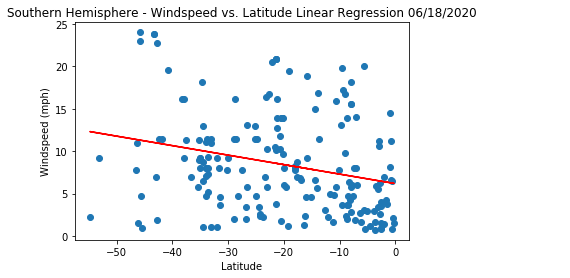

In [21]:
# regression calculation
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Windspeed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatter plot code
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Southern Hemisphere - Windspeed vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')

print(f"The r-squared is: {rvalue}")

# save image
plt.savefig("output_data/Southern Hemisphere - Windspeed vs. Latitude Linear Regression.png")

plt.show()